In [7]:
import pandas as pd

# Cargar etiquetas
labels_path = "data/labels_path.csv"
df = pd.read_csv(labels_path)

len(df)

2100

In [8]:
import os

#Contar cuántas imágenes hay en la carpeta train
train_dir = "data/train"
imagenes_train = [f for f in os.listdir(train_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

print(f"Total imágenes en train/: {len(imagenes_train)}")

Total imágenes en train/: 3312


Hay más imágenes en train que etiquetas... solo me quedare con las 2100 primeras

In [9]:
import os
import cv2
import numpy as np

def cargar_datos(csv_path, img_dir, img_size=(224, 224)):
    """
    Carga las imágenes y sus etiquetas en arrays listos para entrenamiento.
    
    Parámetros:
    - csv_path: Ruta al archivo CSV con etiquetas.
    - img_dir: Carpeta donde están las imágenes.
    - img_size: Tamaño al que se redimensionarán las imágenes.

    Retorna:
    - X: Array de imágenes procesadas.
    - y: Array de etiquetas.
    """

    df = pd.read_csv(csv_path)

    # Listas para almacenar imágenes y etiquetas
    X, y = [], []

    for _, row in df.iterrows():
        img_path = os.path.join(img_dir, os.path.basename(row["path"]))  
        
        if os.path.exists(img_path):  
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            img = cv2.resize(img, img_size)  # Redimensionar
            
            X.append(img)
            y.append(row["label"])  # Etiqueta 0 o 1

    # Convertir listas a arrays de NumPy
    X = np.array(X, dtype=np.float32) / 255.0  # Normalizar imágenes
    y = np.array(y, dtype=np.int32)

    return X, y


In [10]:
csv_path = "data/labels_path.csv"
img_dir = "data/train"

X_train, y_train = cargar_datos(csv_path, img_dir)

print(f" Total imágenes cargadas: {X_train.shape[0]}")
print(f" Dimensión de una imagen: {X_train.shape[1:]}")
print(f" Etiquetas disponibles: {np.unique(y_train, return_counts=True)}")


📊 Total imágenes cargadas: 2100
📸 Dimensión de una imagen: (224, 224, 3)
🔖 Etiquetas disponibles: (array([0, 1]), array([1057, 1043], dtype=int64))


# Están bastante equilibradas las fotos que hay maripossas con las que no


# Entrenamos el modelo

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 637ms/step - accuracy: 0.5027 - loss: 3.2110 - val_accuracy: 0.6071 - val_loss: 0.6136
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 559ms/step - accuracy: 0.6743 - loss: 0.5693 - val_accuracy: 0.7798 - val_loss: 0.4525
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 519ms/step - accuracy: 0.8803 - loss: 0.3532 - val_accuracy: 0.8988 - val_loss: 0.2416
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 490ms/step - accuracy: 0.9308 - loss: 0.1930 - val_accuracy: 0.9464 - val_loss: 0.1503
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.9783 - loss: 0.1038 - val_accuracy: 0.9732 - val_loss: 0.0989
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 502ms/step - accuracy: 0.9907 - loss: 0.0520 - val_accuracy: 0.9762 - val_loss: 0.0691
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 496ms/step - accuracy: 0.9966 - loss: 0.0272 - val_accuracy: 0.9851 - val_loss: 0.0576
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 497ms/step - accuracy: 0.9979 - loss: 0.0195 - val_accu

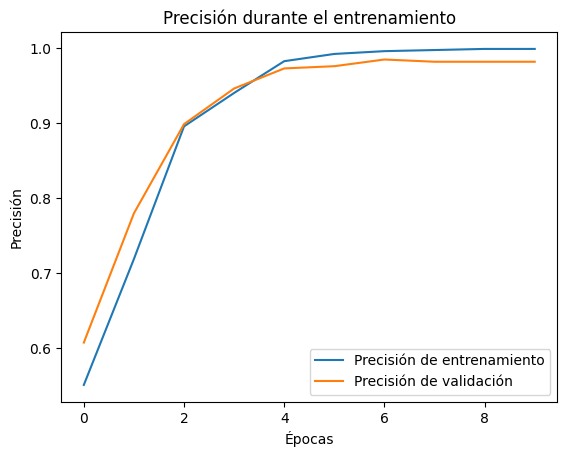

✅ El modelo ha sido guardado en models\modelo_mariposas.h5


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1.Definir el modelo CNN más básico
def crear_cnn(input_shape=(224, 224, 3)):
    model = models.Sequential()

    # Primera capa convolucional + pooling
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Segunda capa convolucional + pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Aplanado para la capa densa
    model.add(layers.Flatten())

    # Capa densa
    model.add(layers.Dense(64, activation='relu'))

    # Capa de salida (binaria)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compilación del modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# 2.Crear el modelo CNN
modelo = crear_cnn()

# 3.Ver el resumen del modelo
modelo.summary()

# 4.Aplicar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# 5.Entrenar el modelo con los datos que ya cargaste
batch_size = 64  
epochs = 10  

history = modelo.fit(X_train, y_train, validation_split=0.2,  # Usamos un 20% para validación
                     batch_size=batch_size, epochs=epochs, 
                     callbacks=[early_stopping])

# 6.Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# 7.Crear la carpeta 'models' si no existe
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# 8.Guardar el modelo en formato .h5
model_path = os.path.join(model_dir, "modelo_mariposas.h5")
modelo.save(model_path)

print(f"✅ El modelo ha sido guardado en {model_path}")


In [ ]:
from tensorflow.keras.preprocessing import image
import json

# 1.Cargar el modelo guardado
model_path = "models/modelo_mariposas.h5"
modelo = tf.keras.models.load_model(model_path)

# 2.Preprocesar las imágenes de test
def cargar_imagenes_test(img_dir, target_size=(224, 224)):
    imagenes = []
    imagenes_rutas = []
    
    #Recorremos todas las imágenes en el directorio de test
    for img_name in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_name)
        
        # Cargar imagen
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)  # Convertir a array
        img_array = img_array / 255.0  # Normalizar a [0, 1]
        
        imagenes.append(img_array)
        imagenes_rutas.append(img_name)  # Guardamos el nombre de la imagen
    
    return np.array(imagenes), imagenes_rutas

# Cargar imágenes de test
test_dir = "data/test"  # Ruta a las imágenes de test
X_test, imagenes_rutas = cargar_imagenes_test(test_dir)

# 3.Hacer predicciones
predicciones = modelo.predict(X_test)

# 4.Convertir las predicciones en formato 0 o 1 (Mariposa o No mariposa)
predicciones_binarias = (predicciones > 0.5).astype(int)  # Si predicción > 0.5, es mariposa (1)

# 5.Crear el diccionario de resultados (predictions.json)
predictions_dict = {imagen: int(pred[0]) for imagen, pred in zip(imagenes_rutas, predicciones_binarias)}

# 6.Guardar las predicciones en un archivo JSON
predictions_json_path = "predictions/predictions.json"
os.makedirs(os.path.dirname(predictions_json_path), exist_ok=True)

#Guardamos el diccionario en un archivo JSON
with open(predictions_json_path, 'w') as json_file:
    json.dump({"target": predictions_dict}, json_file, indent=4)

print(f"✅ Las predicciones se han guardado en {predictions_json_path}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
✅ Las predicciones se han guardado en predictions/predictions.json
